In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#reading the dataset
df = pd.read_csv('breast cancer data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#understanding and getting insights from the dataset

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [7]:
df.shape

(569, 32)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Detecting outliers through plots and removing them

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_se'>

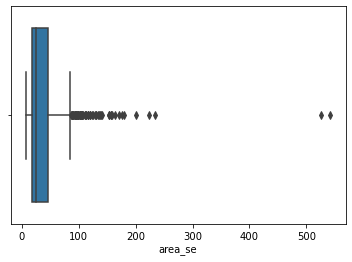

In [11]:
sns.boxplot(df['area_se'])

In [12]:
df.loc[df['area_se']>300]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [13]:
df.drop([212, 461], axis = 0, inplace = True)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fractal_dimension_worst'>

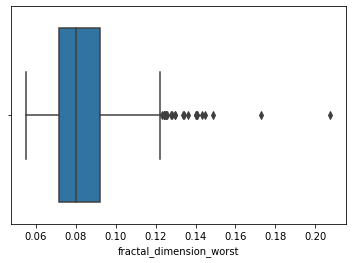

In [14]:
sns.boxplot(df['fractal_dimension_worst'])

In [15]:
df.loc[df['fractal_dimension_worst']>0.16]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
9,84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075


In [16]:
df.drop([3,9], axis = 0, inplace = True)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_mean'>

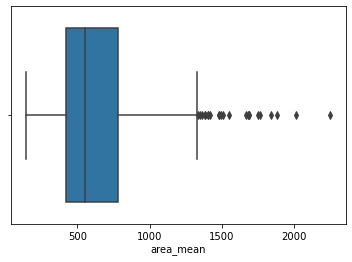

In [17]:
sns.boxplot(df['area_mean'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compactness_se'>

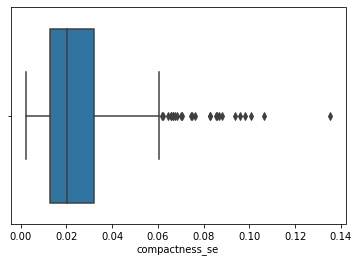

In [18]:
sns.boxplot(df['compactness_se'])

In [19]:
df.loc[df.compactness_se > 0.12]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
190,874858,M,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,...,15.74,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.1446


In [20]:
df.drop(190, axis = 0, inplace = True)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compactness_mean'>

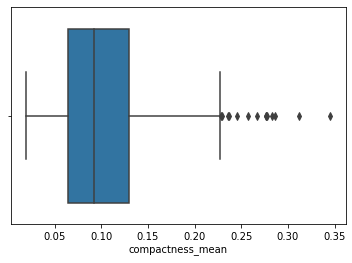

In [21]:
sns.boxplot(df['compactness_mean'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fractal_dimension_se'>

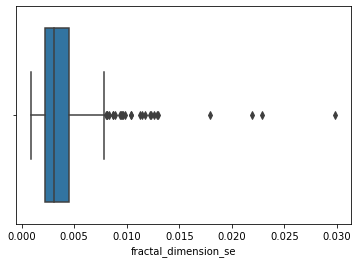

In [22]:
sns.boxplot(df['fractal_dimension_se'])

In [23]:
df.loc[df.fractal_dimension_se > 0.015]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
290,89143602,B,14.410,19.73,96.03,651.0,0.08757,0.1676,0.13620,0.06602,...,15.770,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799


In [24]:
df.drop([71, 152, 176, 290], axis = 0, inplace = True)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fractal_dimension_mean'>

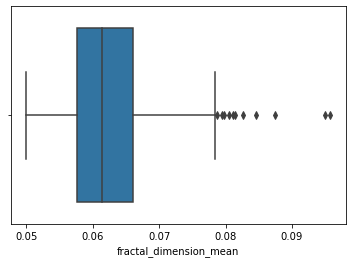

In [25]:
sns.boxplot(df['fractal_dimension_mean'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='concavity_mean'>

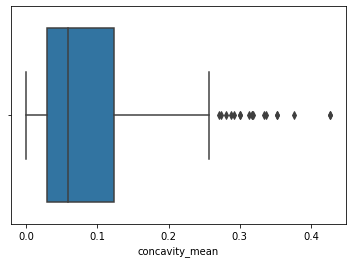

In [26]:
sns.boxplot(df['concavity_mean'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

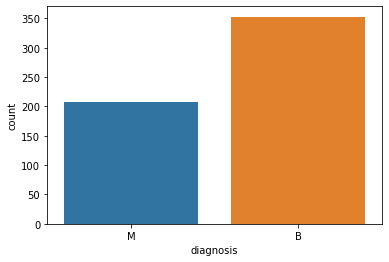

In [27]:
sns.countplot(df['diagnosis'])

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

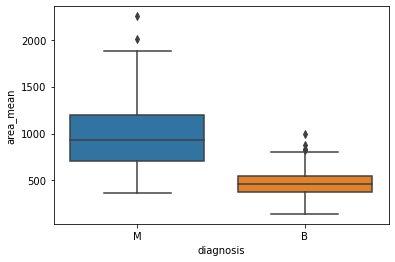

In [28]:
sns.boxplot(x='diagnosis', y = 'area_mean', data = df)

<AxesSubplot:xlabel='area_se', ylabel='area_mean'>

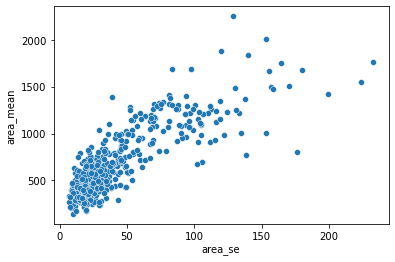

In [29]:
sns.scatterplot(x='area_se', y = 'area_mean', data = df)

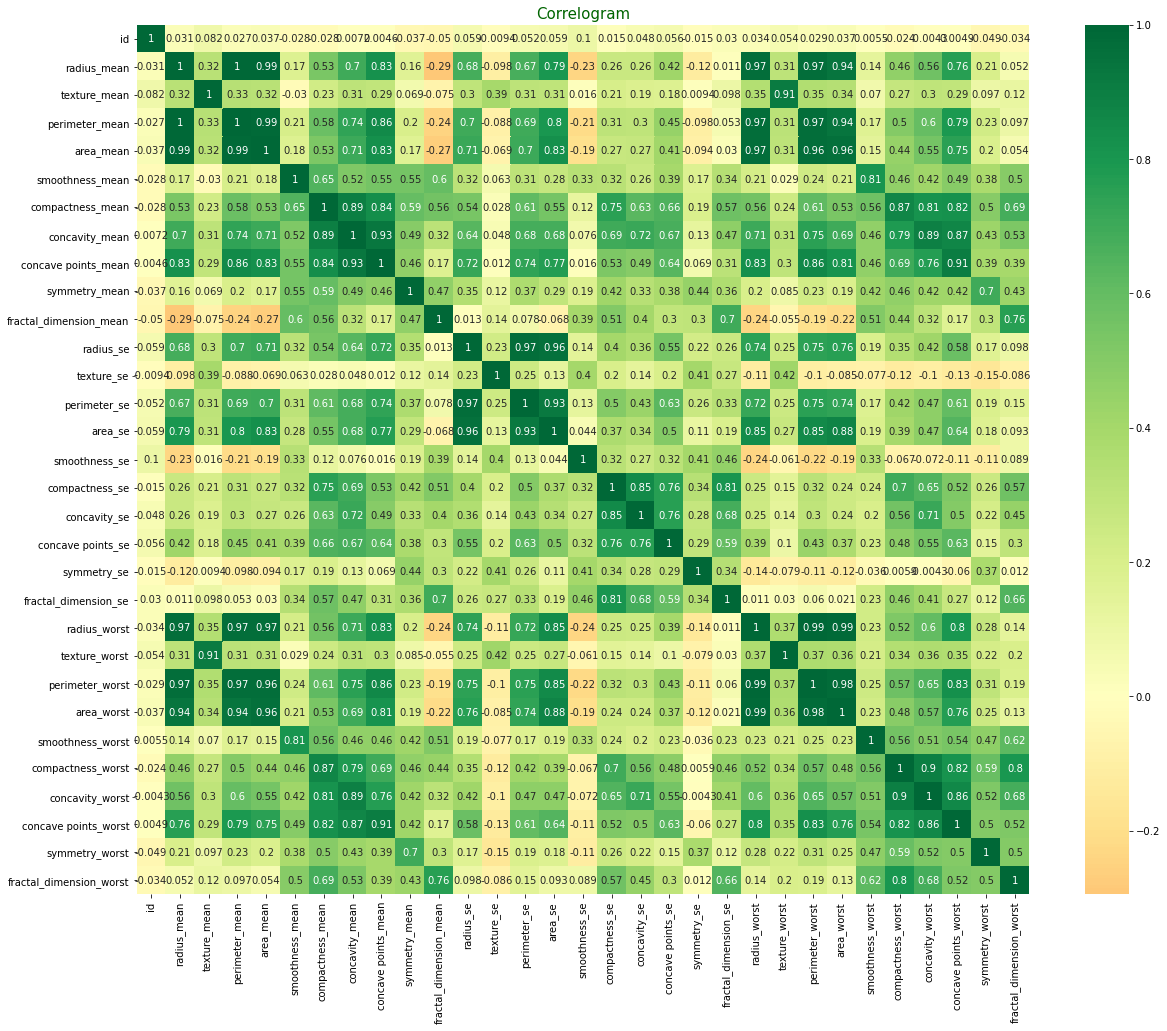

In [30]:
#Checking the correlation to discover if there are multicolinearity between the columns

corr = df.corr()
plt.figure(figsize = (20, 16))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

From the correlation diagram, i detected that some features are highly correlated(causing them to have very high variance), 
therefore some of the features are not needed.
For this reason i decided to use VIF(Variance Inflation Factor) which helps to detect multicollinearity and 
measure each variance with respect to the entire variance.

In [31]:
#using vif and removing unnecessary features
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(features):
    x = df[features]
    x['intercept'] = 1
    vif = pd.DataFrame()
    vif['variable'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif = vif[vif['variable']!='intercept']
    return vif

In [32]:
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst','texture_worst', 'texture_mean','concave points_mean','compactness_mean', 'compactness_worst','concavity_mean','concavity_worst', 'concave points_worst','area_se','perimeter_se','radius_se']
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
1,perimeter_mean,3326.305964
0,radius_mean,3163.956972
3,radius_worst,777.680553
4,perimeter_worst,397.178264
5,area_worst,336.171256
2,area_mean,301.504675
16,radius_se,77.847878
14,area_se,55.490726
11,concavity_mean,51.228630
15,perimeter_se,45.531233


In [33]:
features.remove('perimeter_mean')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
2,radius_worst,760.095965
0,radius_mean,396.792309
3,perimeter_worst,349.726209
4,area_worst,332.186438
1,area_mean,297.834154
15,radius_se,74.651312
13,area_se,54.562870
10,concavity_mean,48.775206
14,perimeter_se,44.752031
7,concave points_mean,41.414679


In [34]:
features.remove('radius_worst')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
2,perimeter_worst,211.172473
0,radius_mean,199.314647
1,area_mean,183.850610
3,area_worst,145.031317
9,concavity_mean,48.602476
12,area_se,42.880601
6,concave points_mean,41.366239
14,radius_se,37.396760
13,perimeter_se,32.839730
10,concavity_worst,27.333872


In [35]:
features.remove('perimeter_worst')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
1,area_mean,120.507384
0,radius_mean,72.713332
8,concavity_mean,48.594432
5,concave points_mean,41.226031
11,area_se,40.366832
2,area_worst,36.890454
13,radius_se,34.945095
9,concavity_worst,27.318583
12,perimeter_se,19.849524
10,concave points_worst,18.979878


In [36]:
features.remove('area_mean')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
7,concavity_mean,46.545227
4,concave points_mean,40.636548
10,area_se,40.197457
12,radius_se,33.493278
8,concavity_worst,26.919021
1,area_worst,26.655926
11,perimeter_se,19.427863
9,concave points_worst,18.107565
5,compactness_mean,16.176601
6,compactness_worst,14.325485


In [37]:
features.remove('concavity_mean')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
9,area_se,38.149941
11,radius_se,32.163967
1,area_worst,25.683901
4,concave points_mean,20.983961
10,perimeter_se,19.152828
8,concave points_worst,14.053167
0,radius_mean,13.748781
5,compactness_mean,13.651136
6,compactness_worst,12.249298
2,texture_worst,8.207525


In [38]:
features.remove('radius_se')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
1,area_worst,25.076996
9,area_se,24.332952
4,concave points_mean,20.684434
8,concave points_worst,14.033855
0,radius_mean,13.554451
5,compactness_mean,13.464080
6,compactness_worst,12.248398
10,perimeter_se,11.756825
2,texture_worst,8.200400
3,texture_mean,7.748745


In [39]:
features.remove('concave points_mean')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
1,area_worst,25.033412
8,area_se,23.848204
0,radius_mean,12.249249
9,perimeter_se,11.722663
7,concave points_worst,9.377219
5,compactness_worst,9.320658
2,texture_worst,8.199471
3,texture_mean,7.748740
4,compactness_mean,7.306582
6,concavity_worst,6.936077


In [40]:
features.remove('area_worst')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
7,area_se,12.597559
8,perimeter_se,9.967512
6,concave points_worst,9.181053
4,compactness_worst,8.767238
1,texture_worst,7.738022
2,texture_mean,7.479885
5,concavity_worst,6.922995
3,compactness_mean,6.741056
0,radius_mean,5.017683


In [41]:
features.remove('area_se')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
6,concave points_worst,9.180998
4,compactness_worst,8.727292
1,texture_worst,7.623048
2,texture_mean,7.348390
5,concavity_worst,6.916009
3,compactness_mean,6.686438
0,radius_mean,3.681061
7,perimeter_se,2.532310


In [42]:
features.remove('compactness_worst')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
5,concave points_worst,8.998475
1,texture_worst,7.429030
2,texture_mean,7.285676
4,concavity_worst,5.044207
3,compactness_mean,4.615543
0,radius_mean,3.583593
6,perimeter_se,2.405284


In [43]:
features.remove('concave points_worst')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
1,texture_worst,6.797681
2,texture_mean,6.659935
3,compactness_mean,3.847419
4,concavity_worst,3.696757
5,perimeter_se,2.405145
0,radius_mean,2.177650


In [44]:
features.remove('texture_worst')
compute_vif(features).sort_values('vif', ascending = False)

<ipython-input-31-8de22f895031>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,variable,vif
2,compactness_mean,3.810970
3,concavity_worst,3.469703
4,perimeter_se,2.369623
0,radius_mean,2.177534
1,texture_mean,1.171465


Since the variable columns (containing the features) VIF values are lower than 5, then it is free from multicolinearity

In [45]:
#Dropping the discovered useless columns
dff = df.drop(['perimeter_mean', 'radius_worst', 'perimeter_worst','area_mean','concavity_mean','radius_se','concave points_mean','area_worst','area_se','compactness_worst','concave points_worst','texture_worst'], axis = 1)

In [46]:
dff.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,8.589,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,3.398,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,4.585,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,5.438,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678
5,843786,M,12.45,15.70,0.12780,0.17000,0.2087,0.07613,0.8902,2.217,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,0.1791,0.5355,0.3985,0.12440


In [47]:
dff.shape

(560, 20)

In [48]:
#label encoding the categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
#Selecting the categorical variables
cat = df.select_dtypes(include = 'object')

In [50]:
for i in cat:
    df[i] = le.fit_transform(df[i])
    dff[i] = le.fit_transform(df[i])

In [51]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [52]:
dff.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,8.589,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,842517,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,3.398,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,84300903,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,4.585,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,5.438,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678
5,843786,1,12.45,15.70,0.12780,0.17000,0.2087,0.07613,0.8902,2.217,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,0.1791,0.5355,0.3985,0.12440


In [53]:
#MODELING

Modeling both the processed and the unprocessed data to show the difference and 
impact of removing the multicolinearity from a dataset

In [54]:
#unprocessed data
x = df.drop(['id','diagnosis'], axis = 1)
y = df['diagnosis']

In [55]:
#processed data
X = dff.drop(['id','diagnosis'], axis = 1)
Y = dff['diagnosis']

In [56]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [58]:
#Trying several model algorithms to know the one with the best accuracy score

In [59]:
lr = LogisticRegression()
rf = RandomForestClassifier()

In [60]:
start = time.time()
lr.fit(x_train,y_train)
print(f'The accuracy score for unprocessed lr is:: {accuracy_score(y_test, lr.predict(x_test))}')
print(f'The f1 score for unprocessed lr is:: {f1_score(y_test, lr.predict(x_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for unprocessed lr is:: 0.9375
The f1 score for unprocessed lr is:: 0.9066666666666667
Time difference:: 0.3910531997680664


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
start = time.time()
rf.fit(x_train,y_train)
print(f'The accuracy score for unprocessed rf is:: {accuracy_score(y_test, rf.predict(x_test))}')
print(f'The f1 score for unprocessed rf is:: {f1_score(y_test, rf.predict(x_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for unprocessed rf is:: 0.9642857142857143
The f1 score for unprocessed rf is:: 0.9487179487179487
Time difference:: 0.32000112533569336


In [62]:
start = time.time()
rf.fit(X_train,Y_train)
print(f'The accuracy score for processed rf is:: {accuracy_score(Y_test, rf.predict(X_test))}')
print(f'The f1 score for processed rf is:: {f1_score(Y_test, rf.predict(X_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for processed rf is:: 0.9732142857142857
The f1 score for processed rf is:: 0.9610389610389611
Time difference:: 0.2649850845336914


In [63]:
start = time.time()
lr.fit(X_train,Y_train)
print(f'The accuracy score for processed lr is:: {accuracy_score(Y_test, rf.predict(X_test))}')
print(f'The f1 score for processed lr is:: {f1_score(Y_test, rf.predict(X_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for processed lr is:: 0.9732142857142857
The f1 score for processed lr is:: 0.9610389610389611
Time difference:: 0.09999346733093262


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [65]:
start = time.time()
dc.fit(X_train,Y_train)
print(f'The accuracy score for processed dc is:: {accuracy_score(Y_test, dc.predict(X_test))}')
print(f'The f1 score for processed dc is:: {f1_score(Y_test, dc.predict(X_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for processed dc is:: 0.9464285714285714
The f1 score for processed dc is:: 0.9210526315789475
Time difference:: 0.014983892440795898


In [66]:
start = time.time()
dc.fit(x_train,y_train)
print(f'The accuracy score for unprocessed dc is:: {accuracy_score(y_test, dc.predict(x_test))}')
print(f'The f1 score for unprocessed dc is:: {f1_score(y_test, dc.predict(x_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for unprocessed dc is:: 0.9464285714285714
The f1 score for unprocessed dc is:: 0.9268292682926831
Time difference:: 0.039962053298950195


In [67]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [68]:
start = time.time()
svc.fit(X_train,Y_train)
print(f'The accuracy score for processed svc is:: {accuracy_score(Y_test, svc.predict(X_test))}')
print(f'The f1 score for processed svc is:: {f1_score(Y_test, svc.predict(X_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for processed svc is:: 0.9464285714285714
The f1 score for processed svc is:: 0.9230769230769231
Time difference:: 0.0450437068939209


In [69]:
start = time.time()
svc.fit(x_train,y_train)
print(f'The accuracy score for unprocessed svc is:: {accuracy_score(y_test, svc.predict(x_test))}')
print(f'The f1 score for unprocessed svc is:: {f1_score(y_test, svc.predict(x_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for unprocessed svc is:: 0.9732142857142857
The f1 score for unprocessed svc is:: 0.9600000000000001
Time difference:: 1.4499001502990723


In [70]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
start = time.time()
etc.fit(X_train,Y_train)
print(f'The accuracy score for unprocessed svc is:: {accuracy_score(Y_test, etc.predict(X_test))}')
print(f'The f1 score for unprocessed svc is:: {f1_score(Y_test, etc.predict(X_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for unprocessed svc is:: 0.9553571428571429
The f1 score for unprocessed svc is:: 0.935064935064935
Time difference:: 0.23998665809631348


In [71]:
from rgf import RGFClassifier
rfg = RGFClassifier()

In [72]:
start = time.time()
rfg.fit(X_train,Y_train)
print(f'The accuracy score for processed rfg is:: {accuracy_score(Y_test, rfg.predict(X_test))}')
print(f'The f1 score for processed rfg is:: {f1_score(Y_test, rfg.predict(X_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for processed rfg is:: 0.9642857142857143
The f1 score for processed rfg is:: 0.9487179487179487
Time difference:: 1.4190294742584229


In [73]:
start = time.time()
rfg.fit(x_train,y_train)
print(f'The accuracy score for unprocessed rfg is:: {accuracy_score(y_test, rfg.predict(x_test))}')
print(f'The f1 score for unprocessed rfg is:: {f1_score(y_test, rfg.predict(x_test))}')
stop = time.time()
print(f'Time difference:: {stop - start}')

The accuracy score for unprocessed rfg is:: 0.9821428571428571
The f1 score for unprocessed rfg is:: 0.9743589743589743
Time difference:: 1.1155385971069336


The processed data having only 18 columns performed as good as the unprocessed data with 30 columns, therefore removing the columns is a good idea.
The best model classifier for the problem is decision tree classifier because it has the shortest time for modeling and the accuracy is the second and third best for the processed and unprocessed data respectively

In [74]:
#A NEW METHOD USING PIPELINE, PCA AND STANDARD SCALAR

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [76]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                       ('pca1', PCA(0.9)),
                       ('lr_classifier', lr)])

In [77]:
pipeline_rf = Pipeline([('scalar2', StandardScaler()),
                       ('pca2', PCA(0.9)),
                       ('rf_classifier', rf)])

In [78]:
pipeline_rgf = Pipeline([('scalar3', StandardScaler()),
                       ('pca3', PCA(0.9)),
                       ('rgf_classifier', rfg)])

In [79]:
pipeline_svm = Pipeline([('scalar4', StandardScaler()),
                       ('pca4', PCA(0.9)),
                       ('svm_classifier', svc)])

In [80]:
pipeline_dc = Pipeline([('scalar5', StandardScaler()),
                       ('pca5', PCA(0.9)),
                       ('dc_classifier', dc)])

In [81]:
#combining the pipelines in a list
pipelines = [pipeline_lr, pipeline_rf, pipeline_rgf, pipeline_svm, pipeline_dc]

In [82]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

In [83]:
pipe_dict = ({0: 'LogisticRegression', 1: "RandomForestClassifier", 2: "RGFClassifier", 3: "SVC", 4: 'Decision tree'})

In [84]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [85]:
for i, model in enumerate(pipelines):
    print(f"{pipe_dict[i]} Test accuracy:: {model.score(x_test, y_test)}")

LogisticRegression Test accuracy:: 0.9821428571428571
RandomForestClassifier Test accuracy:: 0.9732142857142857
RGFClassifier Test accuracy:: 0.9642857142857143
SVC Test accuracy:: 0.9732142857142857
Decision tree Test accuracy:: 0.9196428571428571


In [86]:
for i, model in enumerate(pipelines):
    if model.score(x_test, y_test) > best_accuracy:
        best_accuracy = model.score(x_test, y_test)
        best_pipeline = model
        best_classifier = i
print(f'Classifier with the best accuracy score is :: {pipe_dict[best_classifier]}')

Classifier with the best accuracy score is :: LogisticRegression


In [87]:
from sklearn.metrics import roc_curve, roc_auc_score

In [88]:
preds = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)

auc = roc_auc_score(y_test, preds)

Text(0, 0.5, 'True positive rate')

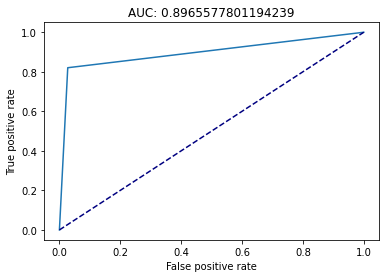

In [89]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

In [104]:
dff.corr()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.023618,0.030713,0.082164,-0.027607,-0.027754,-0.037037,-0.049625,-0.009406,0.052120,0.103334,0.014990,0.047556,0.055928,-0.014972,0.029698,0.005463,-0.004325,-0.049260,-0.034344
diagnosis,0.023618,1.000000,0.740588,0.410185,0.349790,0.598796,0.329056,-0.015080,-0.008462,0.613505,-0.067478,0.322280,0.315849,0.442761,-0.023771,0.132736,0.416403,0.667013,0.418688,0.334250
radius_mean,0.030713,0.740588,1.000000,0.322354,0.171934,0.532313,0.164398,-0.294646,-0.097948,0.674018,-0.234255,0.261759,0.264201,0.418021,-0.119238,0.010620,0.135792,0.560092,0.205843,0.052337
texture_mean,0.082164,0.410185,0.322354,1.000000,-0.030294,0.232946,0.069007,-0.075216,0.393650,0.311498,0.015740,0.210379,0.185572,0.179352,0.009389,0.098382,0.070058,0.297964,0.096983,0.117619
smoothness_mean,-0.027607,0.349790,0.171934,-0.030294,1.000000,0.652240,0.550995,0.595712,0.062691,0.311876,0.331844,0.322622,0.263649,0.388962,0.174349,0.339673,0.805169,0.422026,0.378188,0.498947
compactness_mean,-0.027754,0.598796,0.532313,0.232946,0.652240,1.000000,0.594594,0.555146,0.028473,0.610993,0.120948,0.752943,0.628529,0.656758,0.185873,0.572508,0.561930,0.814649,0.496205,0.685701
symmetry_mean,-0.037037,0.329056,0.164398,0.069007,0.550995,0.594594,1.000000,0.467648,0.115901,0.368484,0.185357,0.417127,0.331898,0.381225,0.443829,0.358683,0.417534,0.415308,0.701588,0.425746
fractal_dimension_mean,-0.049625,-0.015080,-0.294646,-0.075216,0.595712,0.555146,0.467648,1.000000,0.143235,0.078364,0.392029,0.513279,0.404085,0.296049,0.302990,0.696861,0.513959,0.320485,0.300089,0.757319
texture_se,-0.009406,-0.008462,-0.097948,0.393650,0.062691,0.028473,0.115901,0.143235,1.000000,0.248823,0.398642,0.201687,0.140178,0.199462,0.408297,0.268493,-0.077484,-0.100940,-0.148470,-0.085769
perimeter_se,0.052120,0.613505,0.674018,0.311498,0.311876,0.610993,0.368484,0.078364,0.248823,1.000000,0.130016,0.504041,0.431927,0.628752,0.260769,0.331484,0.171223,0.470718,0.187541,0.153019


In [ ]:
#The above shows that we have solved the problem of multicollinearity